In [1]:
import glob
import re
from astropy.io import fits
from astropy.table import Table
import numpy
import seaborn as sns
import pylab
from matplotlib import colors
import matplotlib
import matplotlib.tri as tri

In [2]:
results = []
files = glob.glob("/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210622/*/*S11.fits")
for afile in files:
    with fits.open(afile) as f:
        ret = re.search("v25_(?P<ISO1>.*)_(?P<ISO2>.*).seq",f[0].header["SEQFILE"]).groupdict()
        ret.update( { akey: f[0].header[akey] for akey in ["MJD"] } )
        ret.update({ "std({:02d})".format(i): f[i].data[10:2000,522:].std() for i in range(1,17) } )
        ret.update({ "med({:02d})".format(i): numpy.median(f[i].data[10:2000,522:]) for i in range(1,17) } )        
    results.append(ret)
table = Table(results)
table.meta = fits.open(files[0])[0].header

Text(0.5, 0.98, 'LCA-11021_RTM-004 R22 S11 FP_ITL_2s_ir2_v25_180_460.seq')

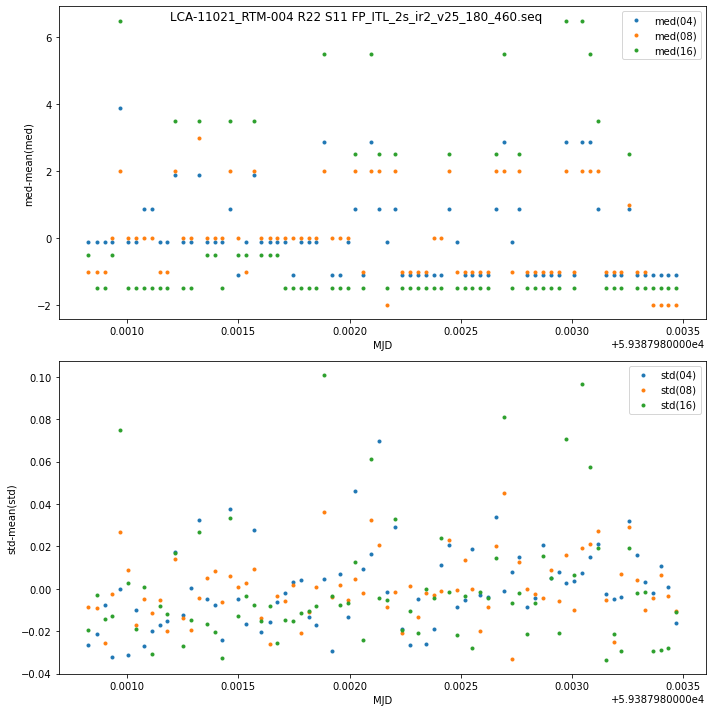

In [63]:
fig, axs = pylab.subplots(2, 1, figsize=(10,10),facecolor='w')

for ch in [ 4, 8, 16 ]:
    for ax, key in zip( axs, ["med","std"] ):
        thekey = "{}({:02d})".format(key,ch)
        cond = (table["med(01)"]<30000)&(table["std(01)"]<30)
        ax.plot(table["MJD"][cond],(table[thekey]-table[thekey][cond].mean())[cond],".", label=thekey)
        ax.legend()
        ax.set_xlabel("MJD")
        ax.set_ylabel("{key}-mean({key})".format(key=key))        
pylab.tight_layout()
pylab.suptitle(" ".join([ table.meta[akey] for akey in ["RAFTNAME","RAFTBAY","CCDSLOT","SEQFILE"] ]))


In [64]:
results = []
files = glob.glob("/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/7007D/BOT_acq/v0/50261/*/*S11.fits")
for afile in files:
    with fits.open(afile) as f:
        ret = {}
        try:
            ret.update(re.search("v25_(?P<ISO1>.*)_(?P<ISO2>.*).seq",f[0].header["SEQFILE"]).groupdict())
        except:
            pass
        ret.update( { akey: f[0].header[akey] for akey in ["MJD"] } )
        ret.update({ "std({:02d})".format(i): f[i].data[10:2000,522:].std() for i in range(1,17) } )
        ret.update({ "med({:02d})".format(i): numpy.median(f[i].data[10:2000,522:]) for i in range(1,17) } )        
    results.append(ret)

In [65]:
table = Table(results)
table.meta = fits.open(files[0])[0].header

Text(0.5, 0.98, 'LCA-11021_RTM-004 R22 S11 FP_ITL_2s_ir2_v25.seq')

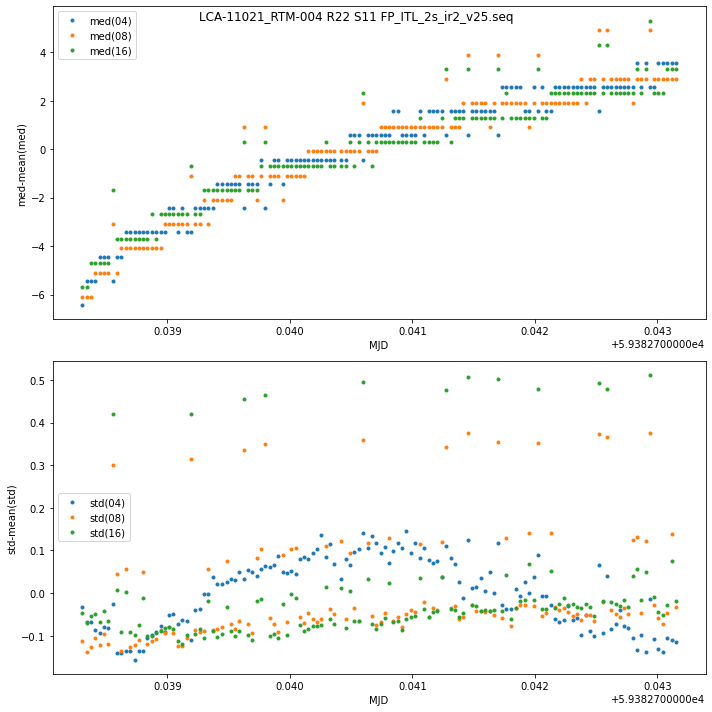

In [66]:
fig, axs = pylab.subplots(2, 1, figsize=(10,10),facecolor='w')

for ch in [ 4, 8, 16 ]:
    for ax, key in zip( axs, ["med","std"] ):
        thekey = "{}({:02d})".format(key,ch)
        cond = (table["med(01)"]<30000)&(table["std(01)"]<30)
        ax.plot(table["MJD"][cond],(table[thekey]-table[thekey][cond].mean())[cond],".", label=thekey)
        ax.legend()
        ax.set_xlabel("MJD")
        ax.set_ylabel("{key}-mean({key})".format(key=key))        
pylab.tight_layout()
pylab.suptitle(" ".join([ table.meta[akey] for akey in ["RAFTNAME","RAFTBAY","CCDSLOT","SEQFILE"] ]))


Text(0.5, 0.98, 'LCA-11021_RTM-004 R22 S11 FP_ITL_2s_ir2_v25.seqJitter Cleaner On')

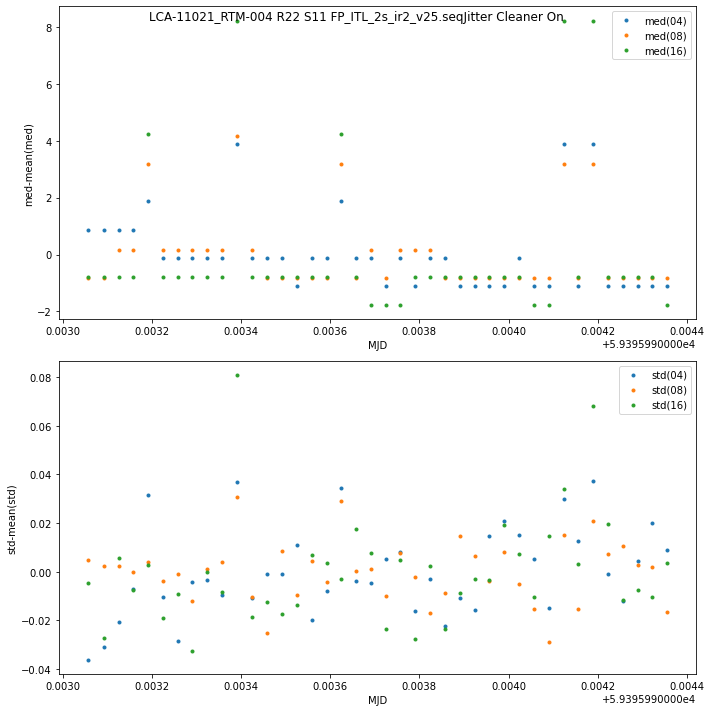

In [69]:
results = []
files = glob.glob("/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210630jitterOn/*/*S11.fits")
for afile in files:
    with fits.open(afile) as f:
        ret = {}
        try:
            ret.update(re.search("v25_(?P<ISO1>.*)_(?P<ISO2>.*).seq",f[0].header["SEQFILE"]).groupdict())
        except:
            pass
        ret.update( { akey: f[0].header[akey] for akey in ["MJD"] } )
        ret.update({ "std({:02d})".format(i): f[i].data[10:2000,522:].std() for i in range(1,17) } )
        ret.update({ "med({:02d})".format(i): numpy.median(f[i].data[10:2000,522:]) for i in range(1,17) } )        
    results.append(ret)
    
table = Table(results)
table.meta = fits.open(files[0])[0].header

fig, axs = pylab.subplots(2, 1, figsize=(10,10),facecolor='w')

for ch in [ 4, 8, 16 ]:
    for ax, key in zip( axs, ["med","std"] ):
        thekey = "{}({:02d})".format(key,ch)
        cond = (table["med(01)"]<30000)&(table["std(01)"]<30)
        ax.plot(table["MJD"][cond],(table[thekey]-table[thekey][cond].mean())[cond],".", label=thekey)
        ax.legend()
        ax.set_xlabel("MJD")
        ax.set_ylabel("{key}-mean({key})".format(key=key))        
pylab.tight_layout()
pylab.suptitle(" ".join([ table.meta[akey] for akey in ["RAFTNAME","RAFTBAY","CCDSLOT","SEQFILE"] ])+"Jitter Cleaner On")


Text(0.5, 0.98, 'LCA-11021_RTM-004 R22 S11 FP_ITL_2s_ir2_v25.seqJitter Cleaner Off')

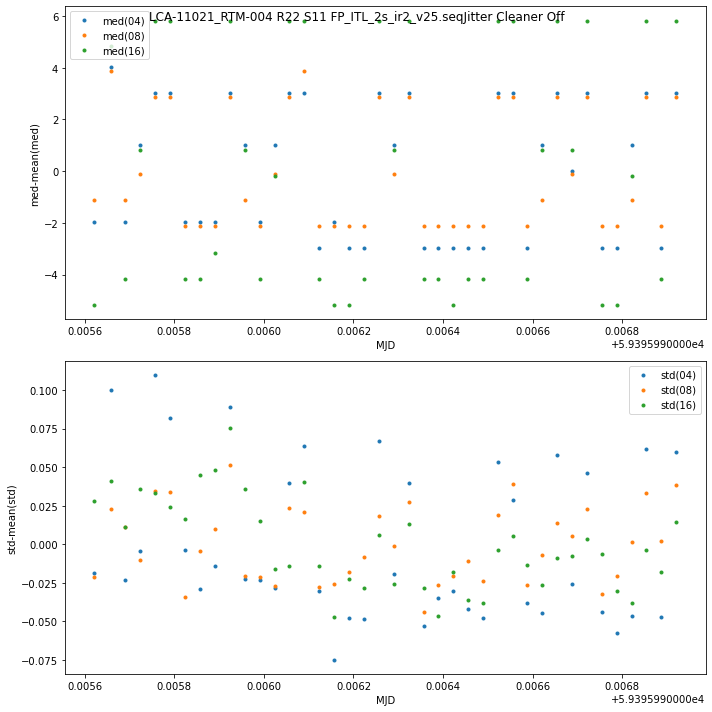

In [70]:
results = []
files = glob.glob("/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210630jitterOff/*/*S11.fits")
for afile in files:
    with fits.open(afile) as f:
        ret = {}
        try:
            ret.update(re.search("v25_(?P<ISO1>.*)_(?P<ISO2>.*).seq",f[0].header["SEQFILE"]).groupdict())
        except:
            pass
        ret.update( { akey: f[0].header[akey] for akey in ["MJD"] } )
        ret.update({ "std({:02d})".format(i): f[i].data[10:2000,522:].std() for i in range(1,17) } )
        ret.update({ "med({:02d})".format(i): numpy.median(f[i].data[10:2000,522:]) for i in range(1,17) } )        
    results.append(ret)
    
table = Table(results)
table.meta = fits.open(files[0])[0].header

fig, axs = pylab.subplots(2, 1, figsize=(10,10),facecolor='w')

for ch in [ 4, 8, 16 ]:
    for ax, key in zip( axs, ["med","std"] ):
        thekey = "{}({:02d})".format(key,ch)
        cond = (table["med(01)"]<30000)&(table["std(01)"]<30)
        ax.plot(table["MJD"][cond],(table[thekey]-table[thekey][cond].mean())[cond],".", label=thekey)
        ax.legend()
        ax.set_xlabel("MJD")
        ax.set_ylabel("{key}-mean({key})".format(key=key))        
pylab.tight_layout()
pylab.suptitle(" ".join([ table.meta[akey] for akey in ["RAFTNAME","RAFTBAY","CCDSLOT","SEQFILE"] ])+"Jitter Cleaner Off")


Text(0.5, 0.98, 'LCA-11021_RTM-004 R22 S11 FP_ITL_2s_ir2_v25.seq [10:2000,522:]')

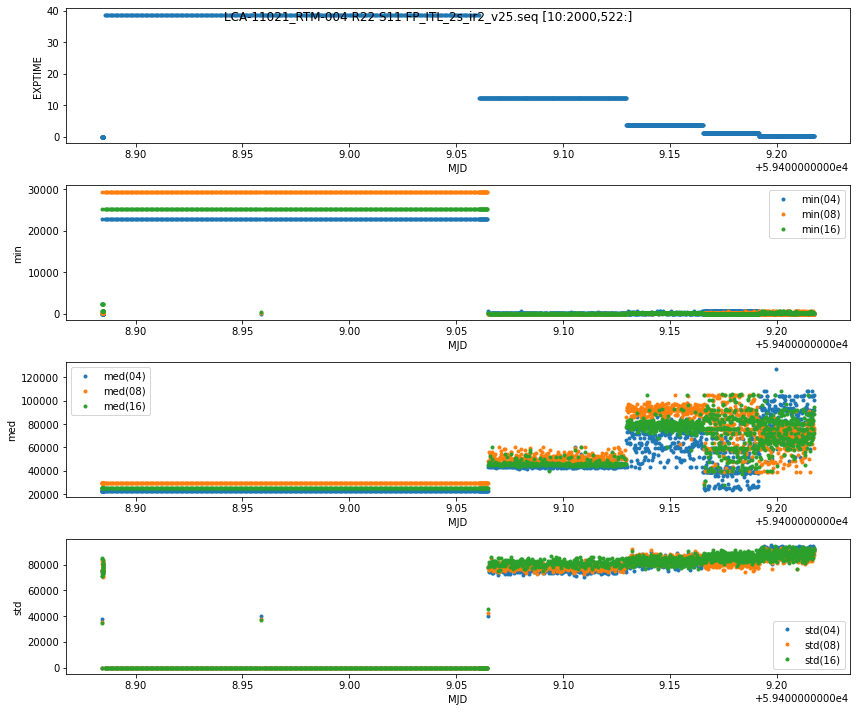

filename,MJD,EXPTIME,std(01),std(02),std(03),std(04),std(05),std(06),std(07),std(08),std(09),std(10),std(11),std(12),std(13),std(14),std(15),std(16),med(01),med(02),med(03),med(04),med(05),med(06),med(07),med(08),med(09),med(10),med(11),med(12),med(13),med(14),med(15),med(16),min(01),min(02),min(03),min(04),min(05),min(06),min(07),min(08),min(09),min(10),min(11),min(12),min(13),min(14),min(15),min(16)
str175,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/7015D/BOT_acq/v0/50433/sflat_flat_SDSSr_?_145/TS_C_20210713_000150_R22_S11.fits,59408.95873444434,38.7597,38730.31980385165,41178.91507581435,38860.4538961089,40117.05749240346,39479.597700620376,40185.54028910974,33864.68583271379,38025.047591517316,40569.51033374885,39952.72259034338,40847.74719158478,36275.759623567836,41852.61236874643,38810.860356455545,37773.761711250794,37270.39893552283,25220.0,23902.0,23354.0,22844.0,23090.0,23906.0,25701.0,29441.0,29473.0,25877.0,24387.0,23322.0,22721.0,22850.0,24379.0,25165.0,177,460,54,49,176,93,77,306,118,118,468,176,870,195,196,365
